<a href="https://colab.research.google.com/github/weieric1001/nfsepsisanalysis/blob/main/tools/NF_neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 呼叫雲端硬碟
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [66]:
# 讀取資料集
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aa5.csv')
print(df)


      sea    wbc     crp   seg  band  nf
0       1  15000   26.38  91.5   8.0   1
1       1  24100  174.27  83.0   2.0   1
2       1   3500    1.94  60.0   2.0   1
3       1  16500  191.54  88.8   0.0   1
4       1  18600  137.31  79.5   7.0   1
...   ...    ...     ...   ...   ...  ..
1410    1   9500  110.58  83.0   0.0   0
1411    0   7000    2.85  71.8   0.0   0
1412    0   5900   21.04  75.0   0.0   0
1413    1  14700   19.87  78.7   0.0   0
1414    0   6700   15.98  66.2   0.0   0

[1415 rows x 6 columns]


In [41]:
# 顯示資料集的描述資料
print('資料集的描述：')
print(df.describe())


資料集的描述：
               sea            wbc          crp          seg         band  \
count  1415.000000    1415.000000  1415.000000  1415.000000  1415.000000   
mean      0.178092   11340.508834    70.930066    75.215760     0.726007   
std       0.382725    6256.728228    84.992794    11.570522     2.912236   
min       0.000000    1100.000000     0.500000     5.300000     0.000000   
25%       0.000000    7500.000000     8.115000    68.000000     0.000000   
50%       0.000000   10100.000000    35.250000    77.000000     0.000000   
75%       0.000000   14000.000000   110.080000    84.000000     0.000000   
max       1.000000  108000.000000   709.310000    96.600000    31.500000   

                nf  
count  1415.000000  
mean      0.122968  
std       0.328517  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


In [42]:
# 顯示資料集的描述資料
print('資料集的描述：')
print(df.describe())


資料集的描述：
               sea            wbc          crp          seg         band  \
count  1415.000000    1415.000000  1415.000000  1415.000000  1415.000000   
mean      0.178092   11340.508834    70.930066    75.215760     0.726007   
std       0.382725    6256.728228    84.992794    11.570522     2.912236   
min       0.000000    1100.000000     0.500000     5.300000     0.000000   
25%       0.000000    7500.000000     8.115000    68.000000     0.000000   
50%       0.000000   10100.000000    35.250000    77.000000     0.000000   
75%       0.000000   14000.000000   110.080000    84.000000     0.000000   
max       1.000000  108000.000000   709.310000    96.600000    31.500000   

                nf  
count  1415.000000  
mean      0.122968  
std       0.328517  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


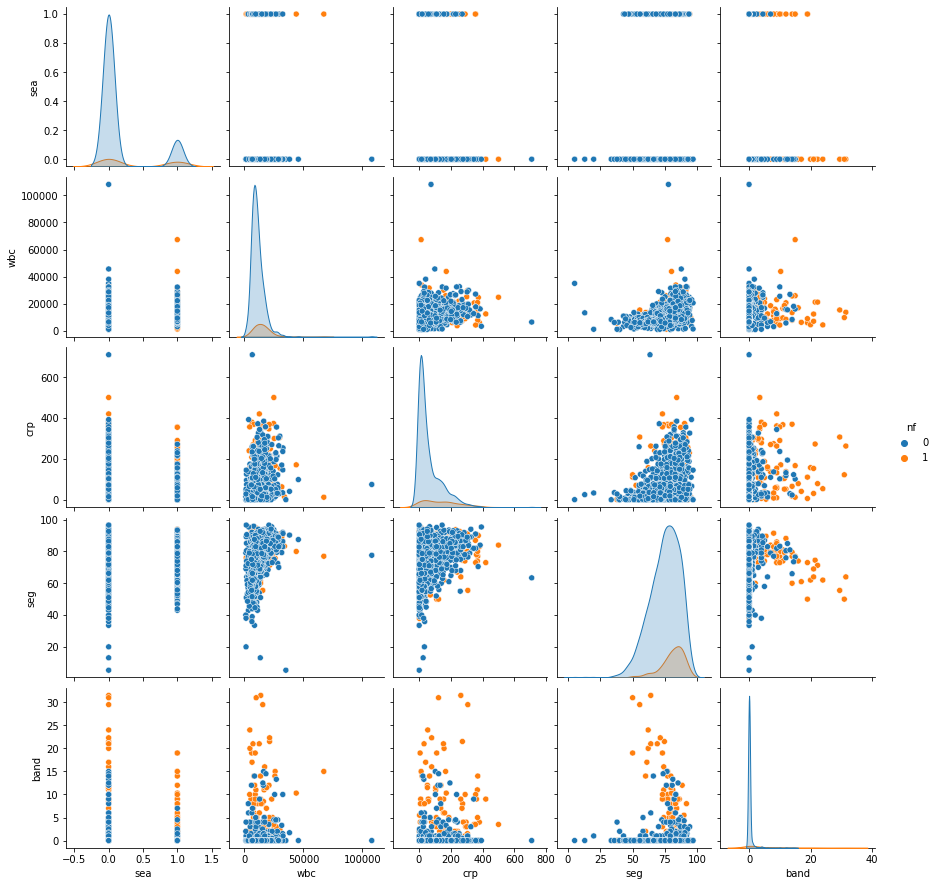

In [ ]:
# 資料視覺化
import seaborn as sns
# 滙入seaborn函數庫(套件)
# 將兩兩變數的圖繪製出來
sns.pairplot(df, hue="nf")


In [57]:
# 顯示資料集的資訊
print('資料集的資訊：')
print(df.info())


資料集的資訊：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sea     1415 non-null   int64  
 1   wbc     1415 non-null   int64  
 2   crp     1415 non-null   float64
 3   seg     1415 non-null   float64
 4   band    1415 non-null   float64
 5   nf      1415 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 66.5 KB
None


In [44]:
# 顯示沒有資料的筆數
print('沒有資料的筆數：')
print(df.isnull().sum())


沒有資料的筆數：
sea     0
wbc     0
crp     0
seg     0
band    0
nf      0
dtype: int64


In [82]:
# 洗牌
import numpy as np
dataset = df.values
np.random.shuffle(dataset)
dataset = pd.DataFrame(dataset)


In [83]:
X = dataset.iloc[:, :5]
y = dataset.iloc[:, 5]


In [84]:
# 定義模型
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

# 定義模型
model = Sequential()
model.add(Dense(28, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(1,  activation='sigmoid'))

# 顯示模型摘要資訊
print('模型摘要資訊：')
model.summary()


# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])


X_train_class_0 = X[y == 0]
X_train_class_1 = X[y == 1]
X_train_class_0_under = X_train_class_0.sample(X_train_class_1.shape[0])
X_train_under = pd.concat([X_train_class_0_under, X_train_class_1], axis=0)
X_train = X_train_under
y_train = y[X_train_under.index]
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
print(X_train_mean)
print(X_train_std)

#正規化
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))

# 訓練模型
print("Training ...")
# X_train：訓練資料的特徵資料
# Y_train：訓練資料的輸出欄位
# validation_split：分割出驗證資料集的比例
# epochs：訓練週期
# batch_size：批次大小
# verbose：訓練過程中訊息顯示的詳細程度
model.fit(X_train, y_train, epochs=300)

模型摘要資訊：
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 28)                168       
                                                                 
 dropout_28 (Dropout)        (None, 28)                0         
                                                                 
 dense_57 (Dense)            (None, 1)                 29        
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________
0        0.267241
1    12802.873563
2       99.245230
3       76.881322
4        2.165805
dtype: float64
0       0.443157
1    6733.317976
2     100.752599
3      11.649307
4       5.155407
dtype: float64
Training ...
Epoch 1/300
11/11 [==============================] - 1s 2ms/step - loss: 0.7525 - accuracy: 0

In [85]:
# 評估模型5 Support Vector Machine
print("Testing ...")

# 計算訓練資料集的準確度
accuracy = model.evaluate(X_train, y_train)
print(accuracy)
# print("Neural Network  訓練資料集的準確度 = {:.4f}".format(accuracy))


Testing ...
11/11 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8305
[0.4312671720981598, 0.8304597735404968]


In [86]:
# 計算全部資料集的準確度
X = df.iloc[:, :5]
Y = df.iloc[:, 5]

X = pd.DataFrame(scaler.fit_transform(X))
accuracy = model.evaluate(X, Y)
print(accuracy)

45/45 [==============================] - 0s 2ms/step - loss: 0.7140 - accuracy: 0.6749
[0.7140361070632935, 0.6749116778373718]


In [87]:
# 儲存模型1
import pickle
print("Saving Model: ...")
model_file_name = 'NF_neuralNetwork.pickle'
with open(model_file_name, 'wb') as f:
    pickle.dump(model, f)

Saving Model: ...


In [5]:
import pickle

model_file_name = 'model/NF_neuralNetwork.pickle'
with open(model_file_name, 'rb') as f:
    model = pickle.load(f)
    pred5 = model.predict(np.array([[1, 2, 3, 4, 5]]))
    print(pred5)

ModuleNotFoundError: No module named 'keras'

In [ ]:
# neuralNetwork
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aa5.csv')
X_train = df.iloc[:, :5]
Y_train = df.iloc[:, 5]
X_train_class_0 = X_train[Y_train == 0]
X_train_class_1 = X_train[Y_train == 1]
X_train_class_0_under = X_train_class_0.sample(X_train_class_1.shape[0])
X_train_mean = X_train_class_0_under.mean(axis=0)
X_train_std = X_train_class_0_under.std(axis=0)
sea_transform = (0 - X_train_mean.sea) / X_train_std.sea
wbc_transform = (14800 - X_train_mean.wbc) / X_train_std.wbc
crp_transform = (34.84 - X_train_mean.crp) / X_train_std.crp
seg_transform = (84.1 - X_train_mean.seg) / X_train_std.seg
band_transform = (0 - X_train_mean.band) / X_train_std.band
pred = {}
model_file_name = 'neuralNetwork.pickle'
with open(model_file_name, 'rb') as f:
    model4 = pickle.load(f)
    pred4 = model4.predict(np.array(
        [[sea_transform, wbc_transform, crp_transform, seg_transform, band_transform]]))
pred4 = pred4[0][0]
print(pred4)
if (pred4 > 0.5):
  pred['neuralNetwork'] = 1
  pred['neuralNetwork_proba'] = np.round(pred4*100, 2)
else:
  pred['neuralNetwork'] = 0
  pred['neuralNetwork_proba'] = 100 - np.round(pred4*100, 2)
print(pred['neuralNetwork'], pred['neuralNetwork_proba'])

1/1 [==============================] - 0s 50ms/step
0.35717312
0 64.28
